In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import silhouette_score, homogeneity_score

from sklearn.preprocessing import MinMaxScaler

In [15]:
data = pd.read_csv("/home/ivana/Desktop/IP-projekat/2023_Data_Mining_Smoking_Dataset/datasets/data1.csv")
data

,Unnamed: 0,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking
0,0,0,40,155,60,81.3,1.2,1.0,1.0,1.0,...,126.0,12.9,1.0,0.7,18.0,19.0,27.0,0,1,0
1,1,0,40,160,60,81.0,0.8,0.6,1.0,1.0,...,127.0,12.7,1.0,0.6,22.0,19.0,18.0,0,1,0
2,2,1,55,170,60,80.0,0.8,0.8,1.0,1.0,...,151.0,15.8,1.0,1.0,21.0,16.0,22.0,0,0,1
3,3,1,40,165,70,88.0,1.5,1.5,1.0,1.0,...,226.0,14.7,1.0,1.0,19.0,26.0,18.0,0,1,0
4,4,0,40,155,60,86.0,1.0,1.0,1.0,1.0,...,107.0,12.5,1.0,0.6,16.0,14.0,22.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,55687,0,40,170,65,75.0,0.9,0.9,1.0,1.0,...,118.0,12.3,1.0,0.6,14.0,7.0,10.0,1,1,0
55688,55688,0,45,160,50,70.0,1.2,1.2,1.0,1.0,...,79.0,14.0,1.0,0.9,20.0,12.0,14.0,0,1,0
55689,55689,0,55,160,50,68.5,1.0,1.2,1.0,1.0,...,63.0,12.4,1.0,0.5,17.0,11.0,12.0,0,0,0
55690,55690,1,60,165,60,78.0,0.8,1.0,1.0,1.0,...,146.0,14.4,1.0,0.7,20.0,19.0,18.0,0,0,0


In [16]:
data.drop('Unnamed: 0', axis=1,inplace=True)

In [17]:
Y = data['smoking']
X = data.drop('smoking', axis=1)
feature_names = X.columns
X.head()

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar
0,0,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,...,73.0,126.0,12.9,1.0,0.7,18.0,19.0,27.0,0,1
1,0,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,...,42.0,127.0,12.7,1.0,0.6,22.0,19.0,18.0,0,1
2,1,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,...,55.0,151.0,15.8,1.0,1.0,21.0,16.0,22.0,0,0
3,1,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,...,45.0,226.0,14.7,1.0,1.0,19.0,26.0,18.0,0,1
4,0,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,...,62.0,107.0,12.5,1.0,0.6,16.0,14.0,22.0,0,0


In [18]:
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=feature_names)
X


,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar
0,0.0,0.307692,0.416667,0.285714,0.388462,0.112245,0.091837,0.0,0.0,0.254438,...,0.112378,0.067240,0.493827,0.0,0.052174,0.009195,0.006179,0.026052,0.0,1.0
1,0.0,0.307692,0.500000,0.285714,0.384615,0.071429,0.051020,0.0,0.0,0.284024,...,0.061889,0.067778,0.481481,0.0,0.043478,0.012261,0.006179,0.017034,0.0,1.0
2,1.0,0.538462,0.666667,0.285714,0.371795,0.071429,0.071429,0.0,0.0,0.396450,...,0.083062,0.080689,0.672840,0.0,0.078261,0.011494,0.005149,0.021042,0.0,0.0
3,1.0,0.307692,0.583333,0.380952,0.474359,0.142857,0.142857,0.0,0.0,0.171598,...,0.066775,0.121033,0.604938,0.0,0.078261,0.009962,0.008582,0.017034,0.0,1.0
4,0.0,0.307692,0.416667,0.285714,0.448718,0.091837,0.091837,0.0,0.0,0.289941,...,0.094463,0.057020,0.469136,0.0,0.043478,0.007663,0.004463,0.021042,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,0.0,0.307692,0.666667,0.333333,0.307692,0.081633,0.081633,0.0,0.0,0.230769,...,0.115635,0.062937,0.456790,0.0,0.043478,0.006130,0.002060,0.009018,1.0,1.0
55688,0.0,0.384615,0.500000,0.190476,0.243590,0.112245,0.112245,0.0,0.0,0.177515,...,0.112378,0.041958,0.561728,0.0,0.069565,0.010728,0.003776,0.013026,0.0,1.0
55689,0.0,0.538462,0.500000,0.190476,0.224359,0.091837,0.112245,0.0,0.0,0.272189,...,0.122150,0.033351,0.462963,0.0,0.034783,0.008429,0.003433,0.011022,0.0,0.0
55690,1.0,0.615385,0.583333,0.285714,0.346154,0.071429,0.091837,0.0,0.0,0.366864,...,0.071661,0.077999,0.586420,0.0,0.052174,0.010728,0.006179,0.017034,0.0,0.0


In [19]:
pca = PCA(n_components=6)
X = pca.fit_transform(X)

In [20]:
pca.explained_variance_ratio_[:2].sum()

0.6258300085473716

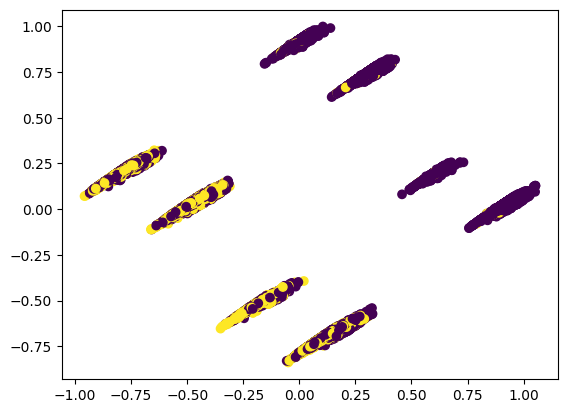

In [21]:
_ = plt.scatter(X[:, 0], X[:, 1], c=Y)

Izbor broja klastera:

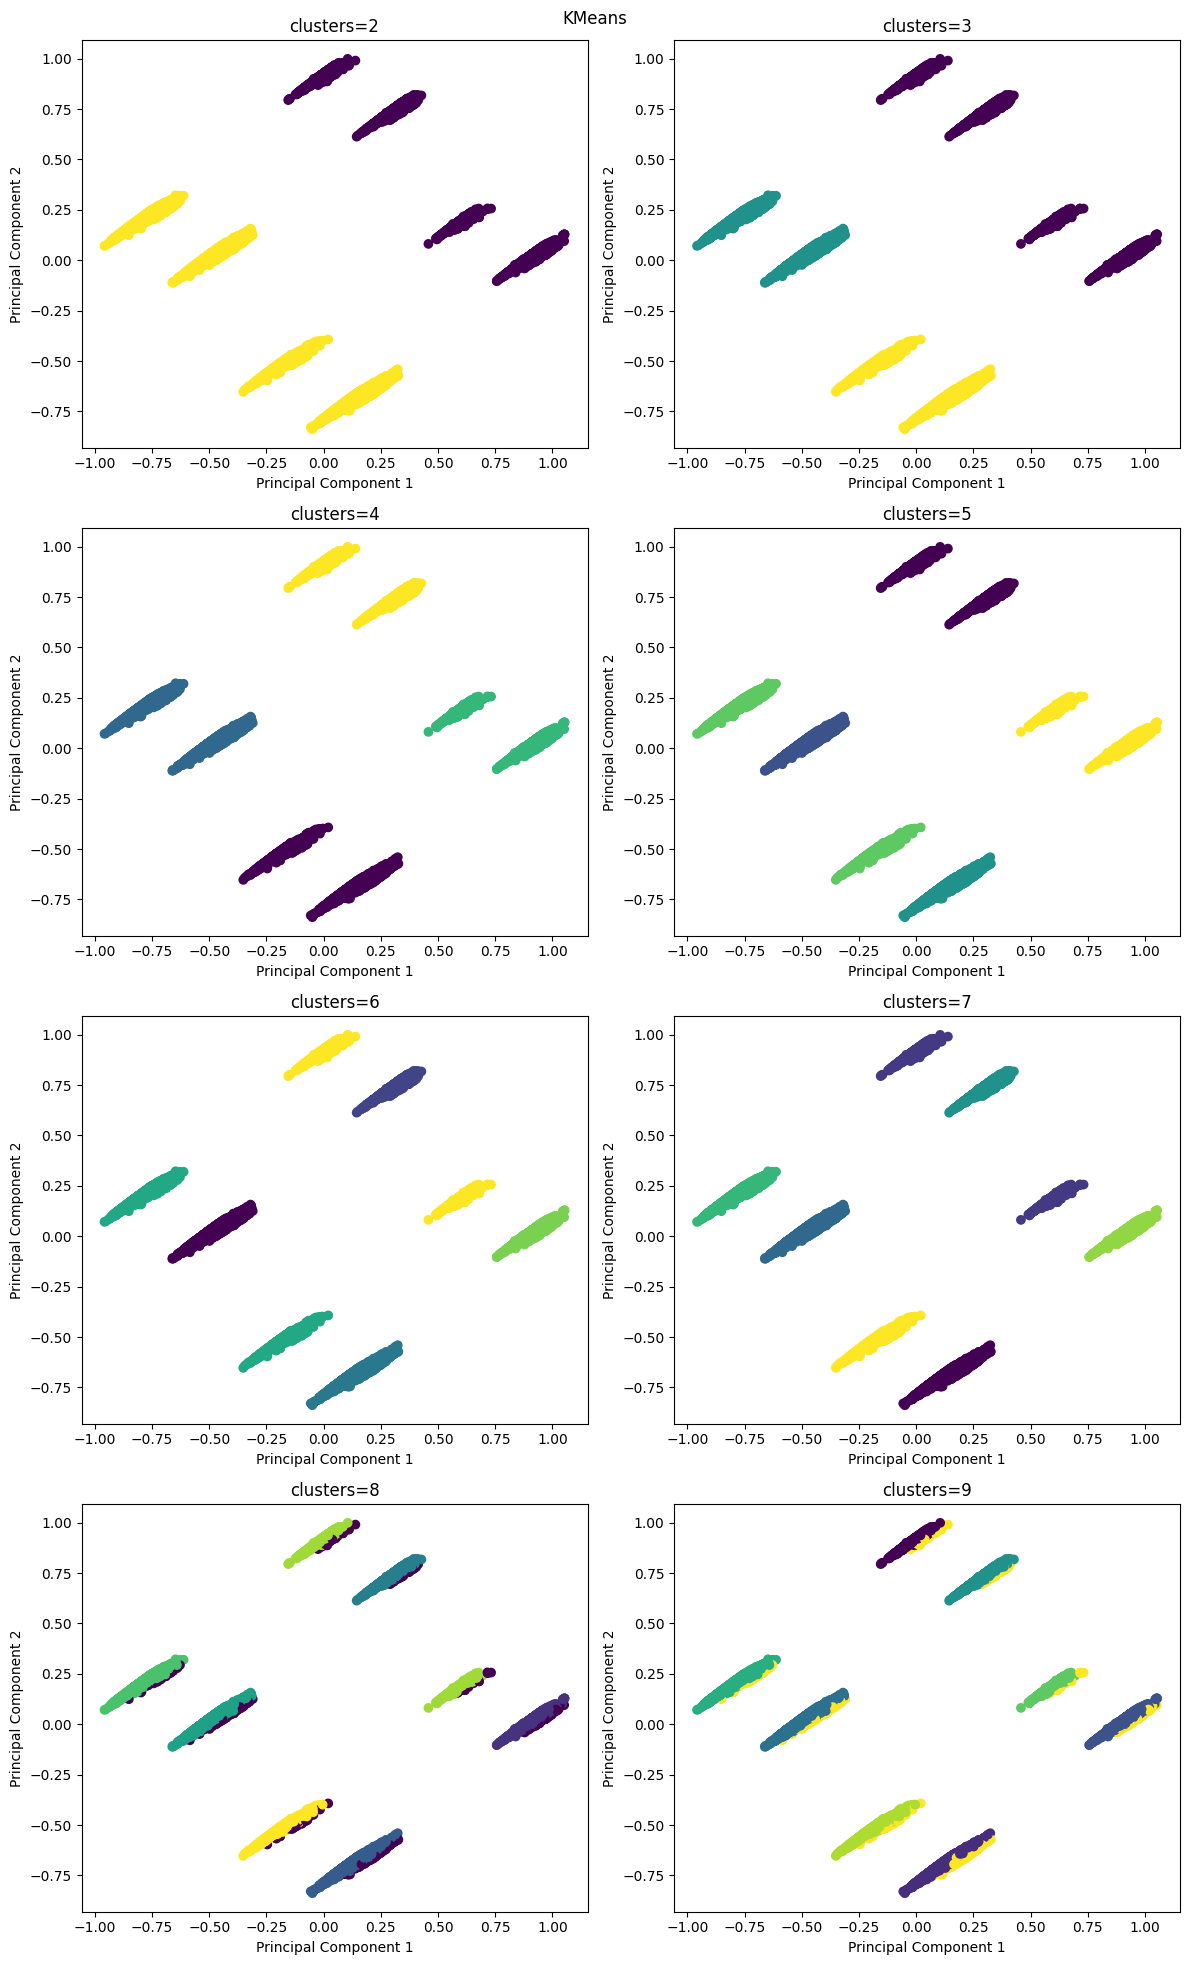

In [22]:
ks = [i for i in range(2, 10)]
sse = []
silhouettes = []

fig, axs = plt.subplots(4, 2, figsize=(12, 20))
fig.suptitle("KMeans")

for k, ax in zip(ks, axs.flatten()):
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(X)

    ax.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
    ax.set_title(f"clusters={k}")
    ax.set_xlabel("Principal Component 1")
    ax.set_ylabel("Principal Component 2")

    sse.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X, kmeans.labels_))

plt.tight_layout()
plt.show()

In [23]:
sse

[28416.113472907677,
 19555.943660753142,
 14422.487559833575,
 9821.223763214333,
 7785.2432749550535,
 6130.084804314643,
 5092.202154162856,
 4385.354930762798]

In [24]:
silhouettes

[0.37739777221048026,
 0.4373134719297514,
 0.522351066625198,
 0.5867095563535512,
 0.6241770034456311,
 0.6627269712977922,
 0.6754444348676408,
 0.6932537274471541]

Text(0, 0.5, 'Skor silueta')

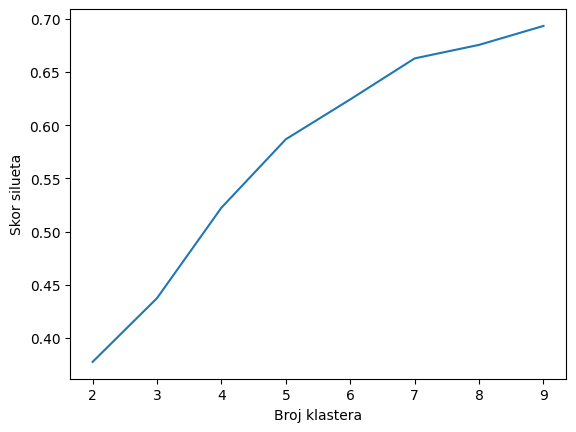

In [35]:
plt.plot(ks, silhouettes)
plt.xlabel('Broj klastera')
plt.ylabel('Skor silueta')


Text(0, 0.5, 'Skor sse')

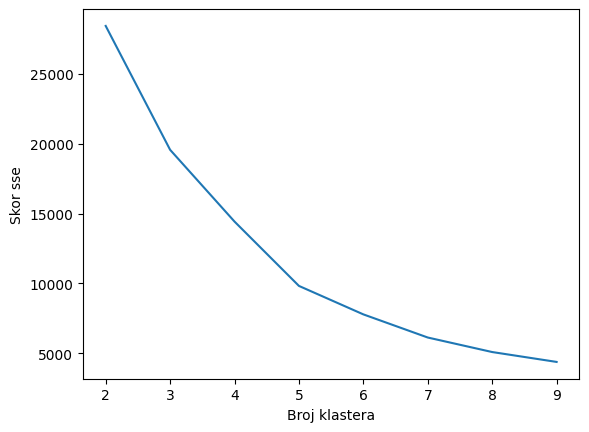

In [36]:
plt.plot(ks, sse)
plt.xlabel('Broj klastera')
plt.ylabel('Skor sse')


Na osnovu pravila lakta vidimo da je najbolji broj klastera 3.

In [27]:
km = KMeans(n_clusters=3, n_init=100, max_iter=500, init='random')
km.fit(X)

KMeans(init='random', max_iter=500, n_clusters=3, n_init=100)

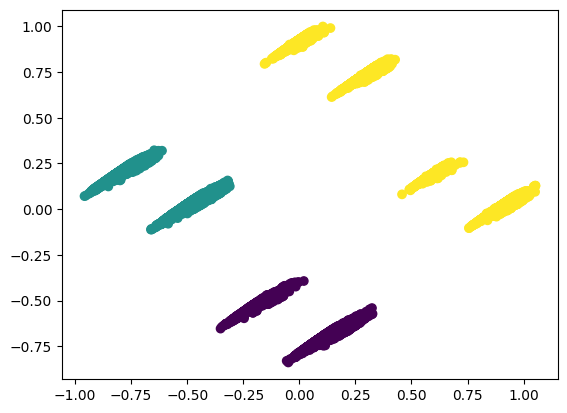

In [28]:
plt.scatter(X[:, 0], X[:, 1], c=km.labels_)

In [29]:
# Silueta
silhouette_score(X, km.labels_, metric='euclidean')

0.4373134719297514

In [30]:
# Homogenost klastera
homogeneity_score(labels_true=Y, labels_pred=km.labels_)

0.24279698394375435

In [31]:
# koja instanca pripada kom klasteru
X[km.labels_ == 0]

array([[ 0.15145281, -0.6739349 , -0.060222  ,  0.09283368, -0.19053291,
        -0.05024962],
       [ 0.09918819, -0.71332955, -0.06284915, -0.03253464, -0.02163471,
         0.01346692],
       [ 0.08638765, -0.71579092, -0.05609619, -0.1494123 ,  0.11932103,
         0.0205575 ],
       ...,
       [ 0.06415951, -0.74184878, -0.06714854, -0.04001057, -0.04534639,
         0.22248998],
       [ 0.06540555, -0.73815158, -0.0645961 , -0.09441142,  0.03385785,
         0.12064123],
       [ 0.19122246, -0.64327303, -0.0572598 ,  0.13843494, -0.22926233,
        -0.15437342]])

In [32]:
from sklearn.metrics import silhouette_samples

silhouette_values = silhouette_samples(X, kmeans.labels_)
silhouette_values

array([0.78438113, 0.77457172, 0.70690269, ..., 0.77131737, 0.64190356,
       0.67663787])